In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def correlation_coefficient(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    return corr_matrix[0, 1]

# Load the training dataset
train_df = pd.read_csv(r"/home/gllaizz/Downloads/train.csv")

# Select features and target variable
X_train = train_df['GrLivArea'].values.reshape(-1, 1)  # Reshape to a 2D array
y_train = train_df['SalePrice'].values

# Normalize features (optional but often helpful for gradient descent)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

# Add a column of ones for the bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Lists to store cost function values for plotting
cost_history = []


In [25]:

# Gradient Descent
for _ in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X_train, theta)

    # Calculate errors
    errors = predictions - y_train

    # Calculate cost (mean squared error)
    cost = np.mean(errors**2)
    cost_history.append(cost)

    # Calculate gradients
    gradients = (1 / len(y_train)) * np.dot(errors, X_train)

    # Update weights
    theta = theta - alpha * gradients

# Print the correlation coefficient as a measure of training accuracy
correlation_train = correlation_coefficient(y_train, predictions)
print(f'Training Correlation Coefficient: {correlation_train:.4f}')



Training Correlation Coefficient: 0.7079


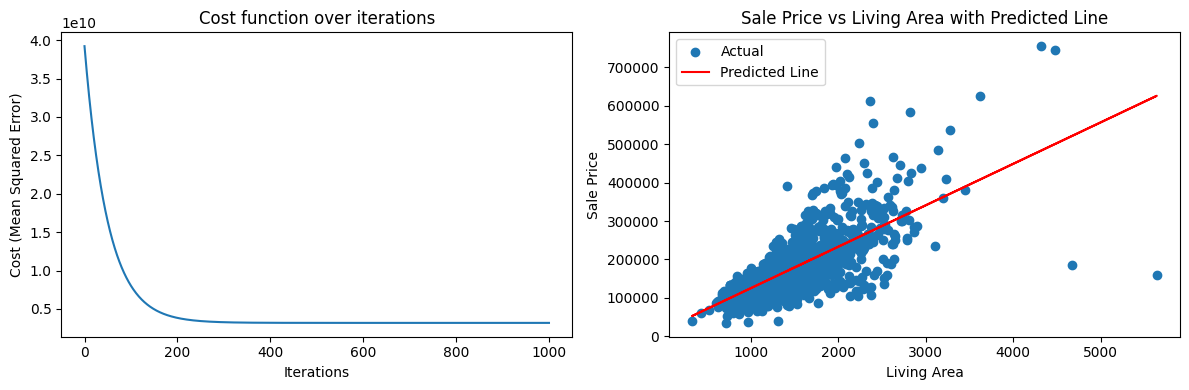

In [26]:

# Plot the cost function over iterations
plt.figure(figsize=(12, 4))

# Subplot for Cost function
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Cost function over iterations')

# Subplot for Sale Price vs Living Area with Predicted Line
plt.subplot(1, 2, 2)
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], label='Actual')
plt.plot(train_df['GrLivArea'], np.dot(X_train, theta), color='red', label='Predicted Line')
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Living Area with Predicted Line')
plt.legend()

plt.tight_layout()
plt.show()
